In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
df_copy = df[['koi_disposition','koi_fpflag_nt','koi_fpflag_ss', 'koi_fpflag_co','koi_fpflag_ec', 'koi_period','koi_time0bk','koi_impact',
  'koi_duration','koi_depth','koi_prad','koi_teq', 'koi_insol','koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 
  'koi_slogg', 'koi_srad','ra','dec','koi_kepmag']]
df_copy = df_copy.reset_index(drop=True)
df_copy.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [4]:
X_df = df_copy.iloc[:,1:22]
X_df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [5]:
y = df_copy.iloc[:,0]
y.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [6]:
y_coded = []
for i in range(len(y)):
    try:
        if y[i]=='CONFIRMED':
            y_coded.append(0)
        elif y[i]=='FALSE POSITIVE':
            y_coded.append(1)
        else:
            y_coded.append(2)
    except:
        pass


In [7]:
print(len(y), len(y_coded))

8744 8744


# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
y_coded = np.asarray(y_coded)
y_coded

array([0, 0, 1, ..., 2, 1, 1])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_coded , random_state=42)

X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
7282,0,1,1,0,0.806277,131.785670,0.697,7.27500,70.8,0.89,2046.0,4119.09,37.9,1.0,6122.0,4.471,0.996,290.81723,38.539120,13.614
1174,0,1,1,0,3.582077,355.515064,0.966,4.42280,1534.4,5.33,1265.0,604.27,138.4,1.0,6109.0,4.422,0.993,296.07822,43.136940,15.193
2485,0,0,0,0,5.060923,134.473160,0.944,2.58600,71.6,0.98,998.0,234.93,15.7,1.0,5637.0,4.492,0.911,289.91742,40.828606,13.346
4447,0,1,0,1,8.480304,135.854534,0.235,7.46159,83115.0,65.00,1504.0,1210.22,5219.5,1.0,7059.0,3.946,2.210,298.80020,46.665539,7.631
6063,0,0,0,1,4.994716,136.183300,0.698,3.44000,53.0,2.20,1861.0,2836.06,14.1,1.0,6409.0,3.706,2.830,282.58215,46.815510,13.352


In [10]:
y_train.shape

(6558,)

# Pre-processing

Scale the data using the MinMaxScaler

In [11]:
X_train_scaler = MinMaxScaler().fit(X_train)
X_test_scaler = MinMaxScaler().fit(X_test)

C:\Users\luron\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
X_train_scaled = X_train_scaler.transform(X_train)
X_test_scaled = X_test_scaler.transform(X_test)

In [13]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
print(y_train.shape, y_test.shape)

(6558,) (2186,)


# Train the Support Vector Machine

In [14]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
predictions = model.predict(X_test_scaled)

In [16]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8115279048490394
Testing Data Score: 0.7868252516010978


In [17]:
print(classification_report(y_test, predictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE", 'CANDIDATE']))

                precision    recall  f1-score   support

     CONFIRMED       0.65      0.50      0.57       594
FALSE POSITIVE       0.98      1.00      0.99      1069
     CANDIDATE       0.56      0.67      0.61       523

     micro avg       0.79      0.79      0.79      2186
     macro avg       0.73      0.73      0.72      2186
  weighted avg       0.79      0.79      0.78      2186




## Train KNN 

In [18]:
train_scores = []
test_scores = []

for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
  

k: 1, Train/Test Score: 1.000/0.754
k: 3, Train/Test Score: 0.886/0.776
k: 5, Train/Test Score: 0.863/0.783
k: 7, Train/Test Score: 0.848/0.784
k: 9, Train/Test Score: 0.839/0.782
k: 11, Train/Test Score: 0.832/0.785
k: 13, Train/Test Score: 0.828/0.780
k: 15, Train/Test Score: 0.828/0.783
k: 17, Train/Test Score: 0.824/0.788
k: 19, Train/Test Score: 0.823/0.792
k: 21, Train/Test Score: 0.823/0.788
k: 23, Train/Test Score: 0.822/0.790
k: 25, Train/Test Score: 0.818/0.791
k: 27, Train/Test Score: 0.818/0.792
k: 29, Train/Test Score: 0.817/0.797
k: 31, Train/Test Score: 0.817/0.795
k: 33, Train/Test Score: 0.816/0.792
k: 35, Train/Test Score: 0.815/0.797
k: 37, Train/Test Score: 0.813/0.790
k: 39, Train/Test Score: 0.811/0.787
k: 41, Train/Test Score: 0.812/0.790
k: 43, Train/Test Score: 0.810/0.789
k: 45, Train/Test Score: 0.809/0.790
k: 47, Train/Test Score: 0.809/0.790
k: 49, Train/Test Score: 0.812/0.787


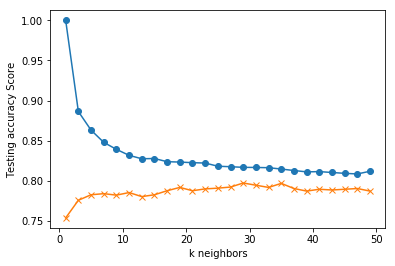

In [19]:
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train_scaled, y_train)

predictions2 = knn.predict(X_test_scaled)


In [21]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.8168648978347057
Testing Data Score: 0.7936870997255261


In [22]:
print(classification_report(y_test, predictions2,
                            target_names=["CONFIRMED", "FALSE POSITIVE", 'CANDIDATE']))

                precision    recall  f1-score   support

     CONFIRMED       0.62      0.67      0.64       594
FALSE POSITIVE       0.98      1.00      0.99      1069
     CANDIDATE       0.60      0.51      0.55       523

     micro avg       0.79      0.79      0.79      2186
     macro avg       0.73      0.73      0.73      2186
  weighted avg       0.79      0.79      0.79      2186



## Train Logistic regr model

In [23]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

predictions3 = classifier.predict(X_test_scaled)

C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [24]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8100030497102775
Testing Data Score: 0.7790484903934126


In [25]:
print(classification_report(y_test, predictions3, target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.67      0.40      0.50       594
FALSE POSITIVE       0.98      1.00      0.99      1069
     CANDIDATE       0.54      0.76      0.63       523

     micro avg       0.78      0.78      0.78      2186
     macro avg       0.73      0.72      0.71      2186
  weighted avg       0.79      0.78      0.77      2186



# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [26]:
# GridSearch for SVM model
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [27]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

C:\Users\luron\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.8075868372943327, total=   0.4s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.8032036613272311, total=   0.4s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.8151029748283752, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8075868372943327, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8032036613272311, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8151029748283752, total=   0.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8075868372943327, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8032036613272311, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8151029748283752, total=   0.5s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   27.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [28]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.8168648978347057


In [29]:
predictions_grid = grid.predict(X_test_scaled)

In [30]:
print(f"Training Data Score: {grid.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test)}")

Training Data Score: 0.819609637084477
Testing Data Score: 0.7932296431838975


In [31]:
print(classification_report(y_test, predictions_grid,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.65      0.55      0.60       594
FALSE POSITIVE       0.98      1.00      0.99      1069
     CANDIDATE       0.57      0.65      0.61       523

     micro avg       0.79      0.79      0.79      2186
     macro avg       0.73      0.73      0.73      2186
  weighted avg       0.79      0.79      0.79      2186



In [36]:
# GridSearch for KNN model

param_grid2 = {'n_neighbors': [10, 30, 50],
              'weights': ['uniform', 'distance']}
grid2 = GridSearchCV(knn, param_grid2, verbose=3)
grid2.fit(X_train_scaled, y_train)

C:\Users\luron\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_neighbors=10, weights=uniform .................................
[CV]  n_neighbors=10, weights=uniform, score=0.796617915904936, total=   0.3s
[CV] n_neighbors=10, weights=uniform .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_neighbors=10, weights=uniform, score=0.7977116704805493, total=   0.3s
[CV] n_neighbors=10, weights=uniform .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  n_neighbors=10, weights=uniform, score=0.7913043478260869, total=   0.3s
[CV] n_neighbors=10, weights=distance ................................
[CV]  n_neighbors=10, weights=distance, score=0.7970749542961609, total=   0.4s
[CV] n_neighbors=10, weights=distance ................................
[CV]  n_neighbors=10, weights=distance, score=0.7963386727688787, total=   0.3s
[CV] n_neighbors=10, weights=distance ................................
[CV]  n_neighbors=10, weights=distance, score=0.7940503432494279, total=   0.3s
[CV] n_neighbors=30, weights=uniform .................................
[CV]  n_neighbors=30, weights=uniform, score=0.7906764168190128, total=   0.4s
[CV] n_neighbors=30, weights=uniform .................................
[CV]  n_neighbors=30, weights=uniform, score=0.8004576659038901, total=   0.4s
[CV] n_neighbors=30, weights=uniform .................................
[CV]  n_neighbors=30, weights=uniform, score=0.8036613272311213, total=   0.3s
[CV] n_neighbors=3

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   23.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [10, 30, 50], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [37]:
print(grid2.best_params_)
print(grid2.best_score_)

{'n_neighbors': 50, 'weights': 'distance'}
0.804513571210735


In [38]:
predictions_grid2 = grid2.predict(X_test_scaled)

In [39]:
print(f"Training Data Score: {grid2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {grid2.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.7900274473924978


In [40]:
print(classification_report(y_test, predictions_grid2,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.62      0.65      0.63       594
FALSE POSITIVE       0.98      1.00      0.99      1069
     CANDIDATE       0.58      0.52      0.55       523

     micro avg       0.79      0.79      0.79      2186
     macro avg       0.73      0.72      0.72      2186
  weighted avg       0.79      0.79      0.79      2186



In [41]:
# GridSearch for logistic regression model

param_grid3 = {'C': [1.0, 0.5, 0.1]}
grid3 = GridSearchCV(classifier, param_grid3, verbose=3)
grid3.fit(X_train_scaled, y_train)

C:\Users\luron\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=1.0 ...........................................................
[CV] ................... C=1.0, score=0.806672760511883, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.8022883295194508, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.8155606407322654, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] .................. C=0.5, score=0.8062157221206582, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] .................. C=0.5, score=0.7986270022883295, total=   0.0s
[CV] C=0.5 ...........................................................


C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

[CV] .................. C=0.5, score=0.8118993135011442, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.7970749542961609, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.7954233409610983, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.8059496567505721, total=   0.0s


C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\luron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.0, 0.5, 0.1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=3)

In [42]:
print(grid3.best_params_)
print(grid3.best_score_)

{'C': 1.0}
0.8081732235437633


In [43]:
predictions_grid3 = grid3.predict(X_test_scaled)

In [44]:
print(f"Training Data Score: {grid3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {grid3.score(X_test_scaled, y_test)}")

Training Data Score: 0.8100030497102775
Testing Data Score: 0.7790484903934126


In [45]:
print(classification_report(y_test, predictions_grid3,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.67      0.40      0.50       594
FALSE POSITIVE       0.98      1.00      0.99      1069
     CANDIDATE       0.54      0.76      0.63       523

     micro avg       0.78      0.78      0.78      2186
     macro avg       0.73      0.72      0.71      2186
  weighted avg       0.79      0.78      0.77      2186



## Overall comparison of models and scores before and after optimization with GridSearch

In [52]:
pd.DataFrame({'Model':['SVM','KNN','Log Reg'], 'Training Score before':[0.811, 0.817, 0.810], 
              'Training Score after':[0.820, 1.000, 0.810], 'Test score before':[0.787, 0.794, 0.799], 'Test score after':[0.793, 0.790, 0.779]})

,Model,Training Score before,Training Score after,Test score before,Test score after
0,SVM,0.811,0.82,0.787,0.793
1,KNN,0.817,1.00,0.794,0.790
2,Log Reg,0.810,0.81,0.799,0.779
